In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd
from matplotlib.pyplot import xlim

from processing.parse_data import load_insar_time_series, pearsonr_by_pid, align_ts_by_pid

folder_path = './input_data'
bbox_path = './input_data/bbox.geojson'
reference_epsg = 4326
working_epsg = 3945
columns_to_plot = ['mean_velocity', 'acceleration']

folder = Path(folder_path)
filepaths = [path for path in folder.rglob('*.csv')][:3]
print('Found ' + str(len(filepaths)) + ' files, loading...')
bbox = gpd.read_file(bbox_path)
gdf_infos, df_ts = load_insar_time_series(filepaths, bbox)
print('Loaded ' + str(len(gdf_infos)) + ' insar points of measures.')

Found 3 files, loading...
Loaded 79 insar points of measures.


In [2]:
df_pearson = pearsonr_by_pid(df_ts)
df_ts_new = df_ts.merge(df_pearson, on =['pid', 'start_year'], how='left')
df_ts_new = align_ts_by_pid(df_ts_new, combine=False, pearson_threshold=0.2)
df_aligned = df_ts_new.merge(gdf_infos, on=['pid', 'start_year'])

date_columns = [col for col in df_ts_new.columns if isinstance(col, pd.Timestamp)]
df_aligned = gpd.GeoDataFrame(df_aligned, geometry='geometry', crs=gdf_infos.crs)

df_out = df_aligned.copy()
df_out.columns = [str(col.strftime('%Y-%m-%d')) if col in date_columns else col for col in df_out.columns]
df_out.to_file('ts_aligned_by_pid.gpkg')

48GeB6Nj5X


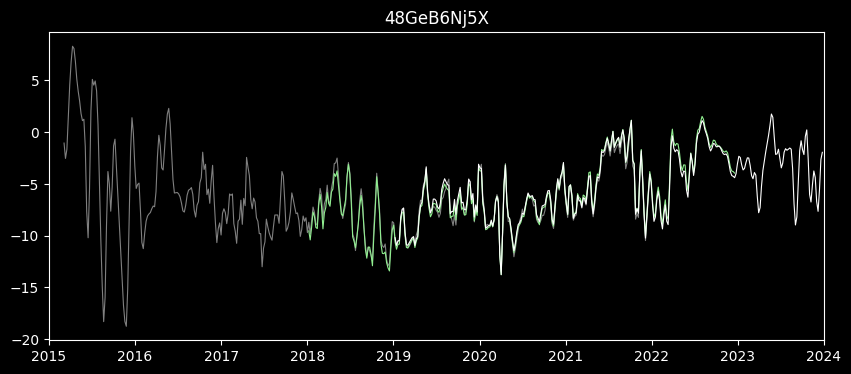

48GeB6Nj5Y


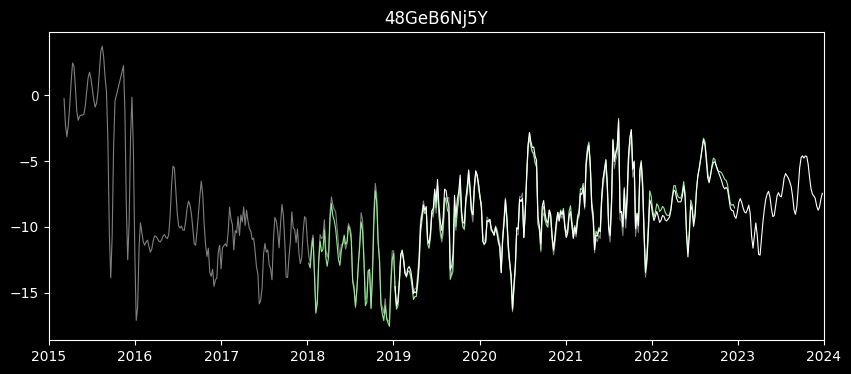

48GeB6Nj5a


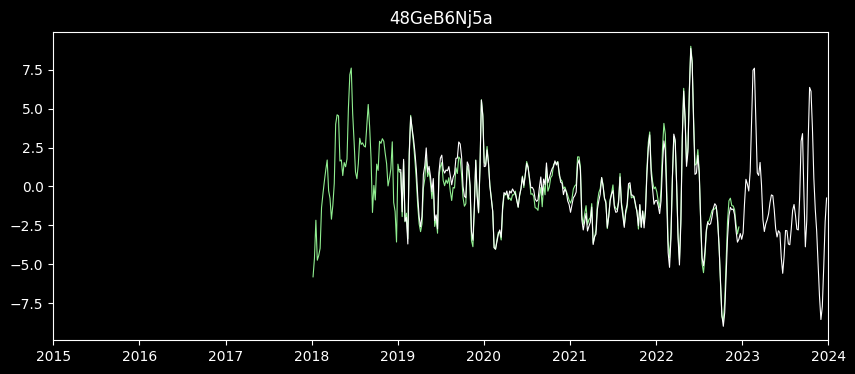

48GeB6Nj5b


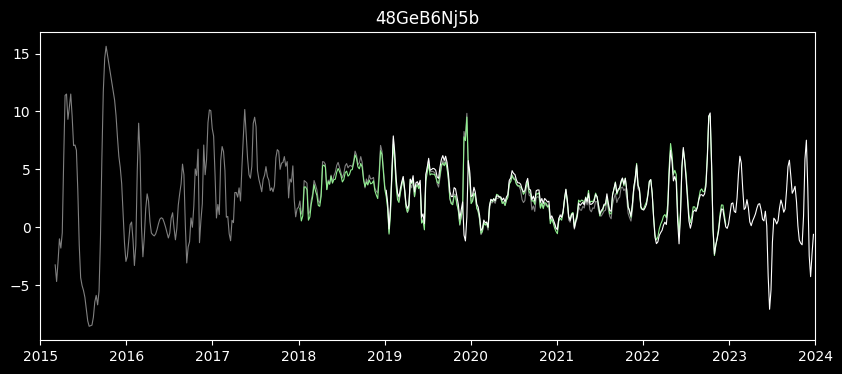

48GeB6Nj5c


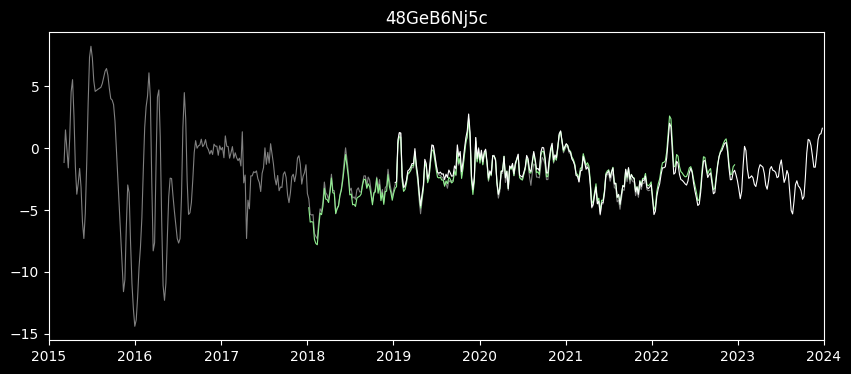

48GeB6Nj5e


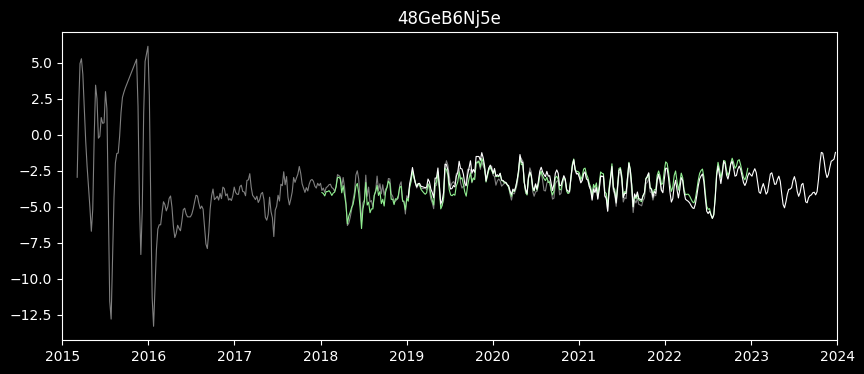

48GeB6Nj5g


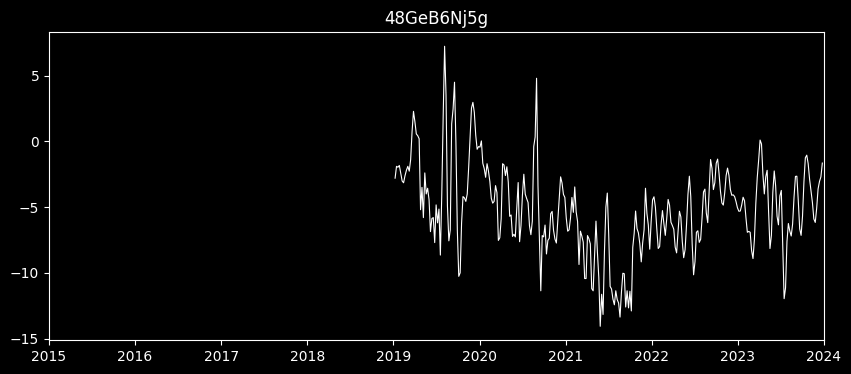

48GeB6O08X


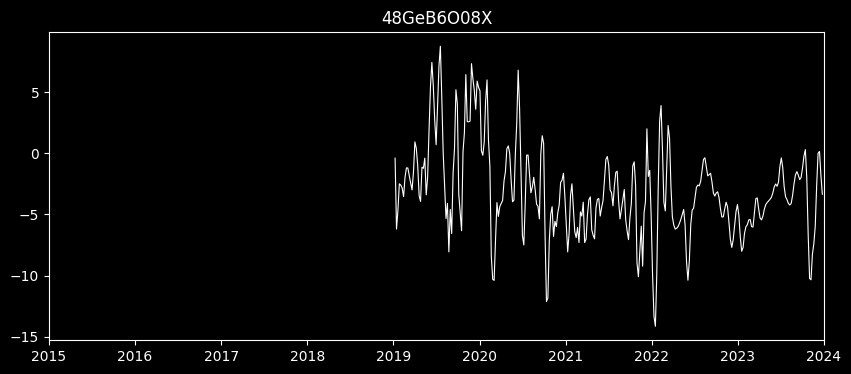

48GeB6O08Z


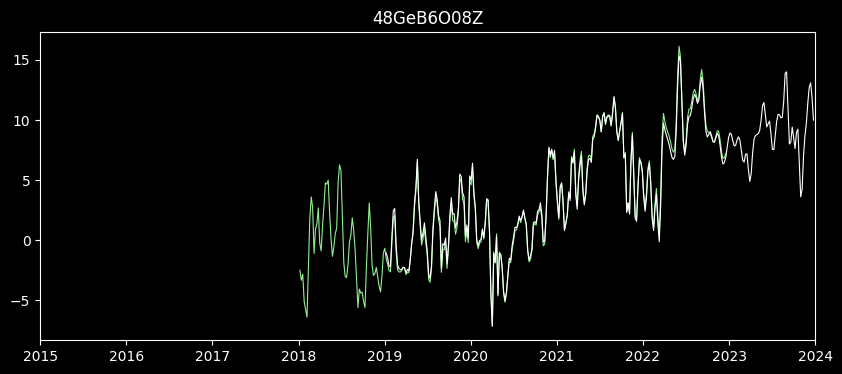

48GeB6O08c


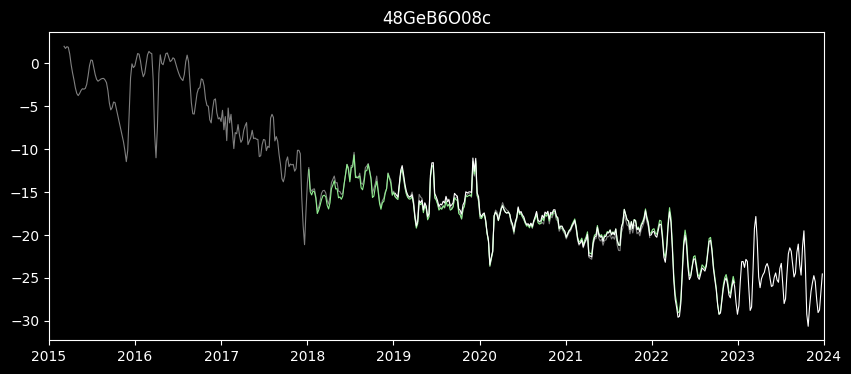

48GeB6O08d


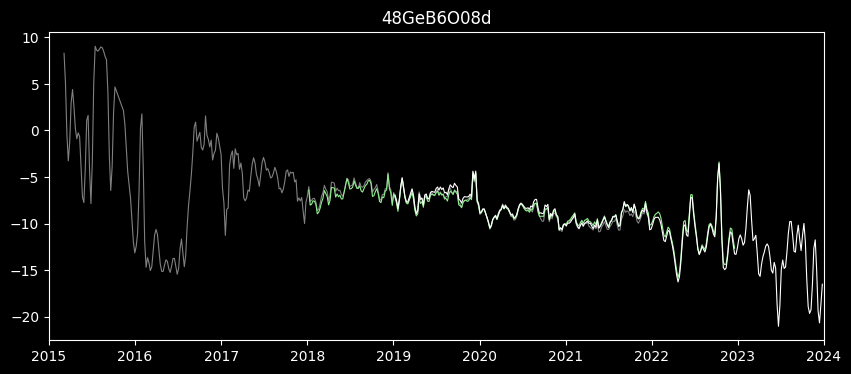

48GeB6O08e


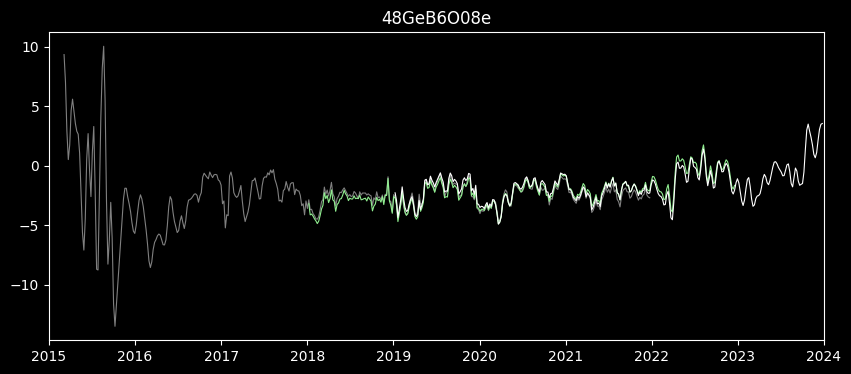

48GeB6O08g


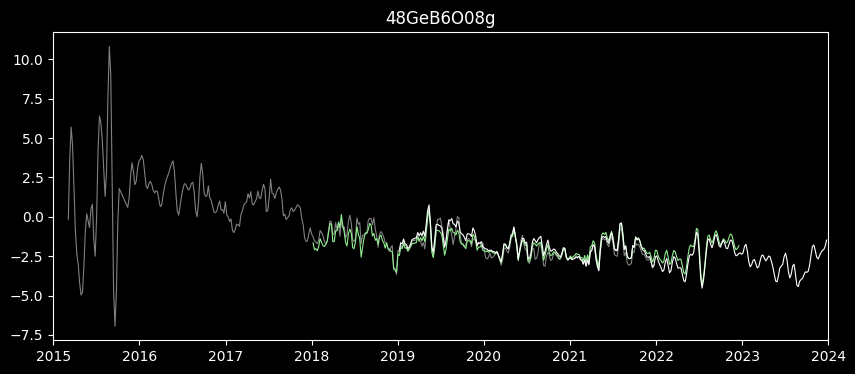

48GeB6O08o


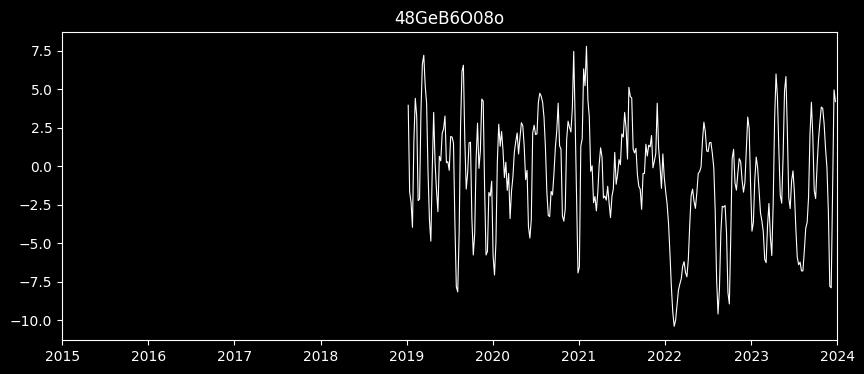

48GeB6OHBZ


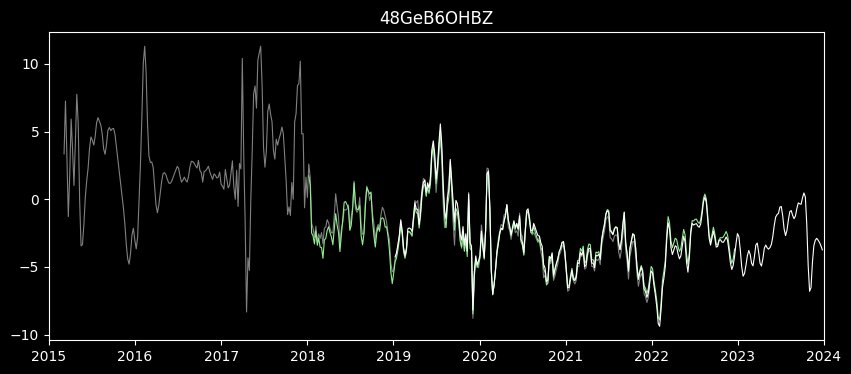

48GeB6OHBa


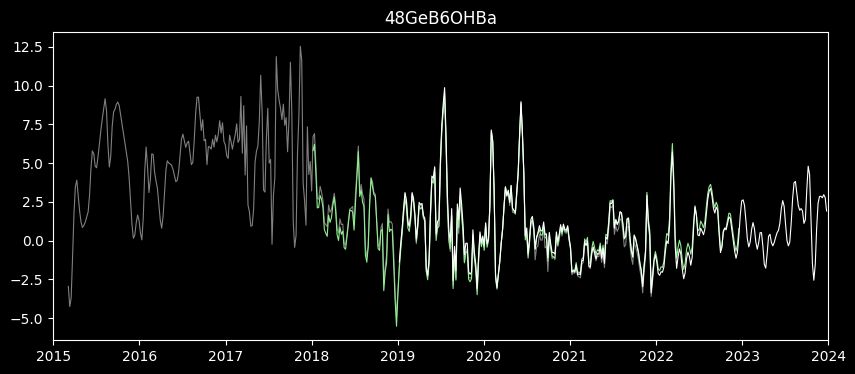

48GeB6OHBc


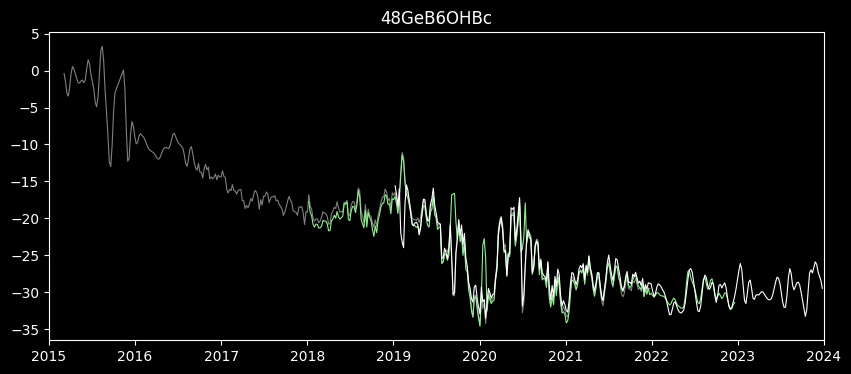

48GeB6OHBd


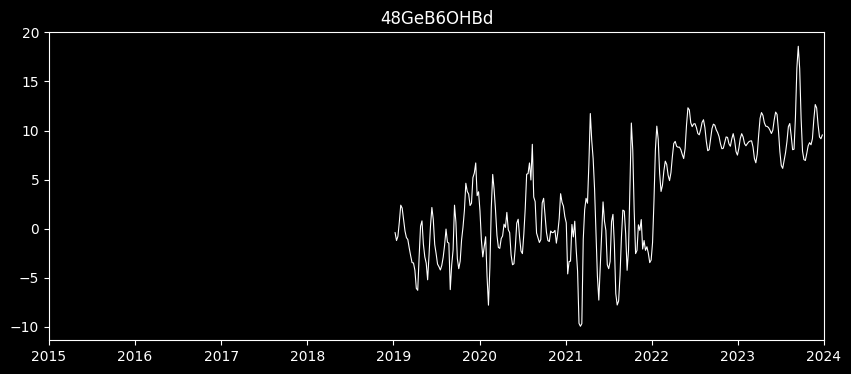

48GeB6OHBf


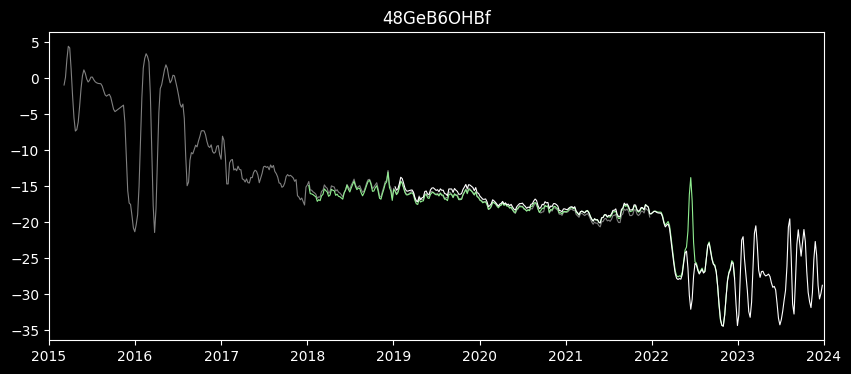

48GeB6OHBi


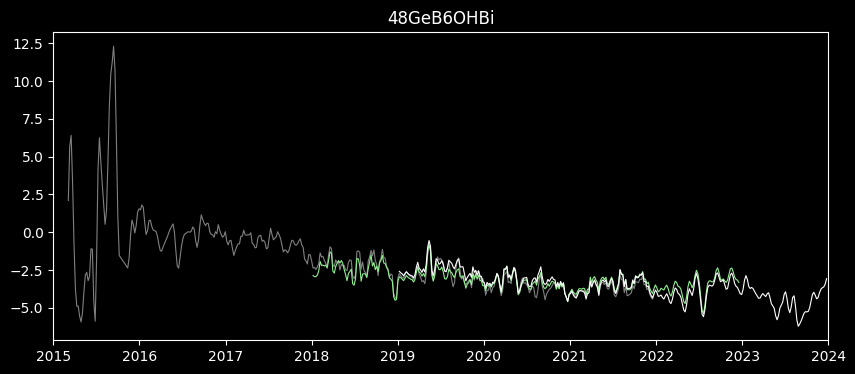

48GeB6OHBk


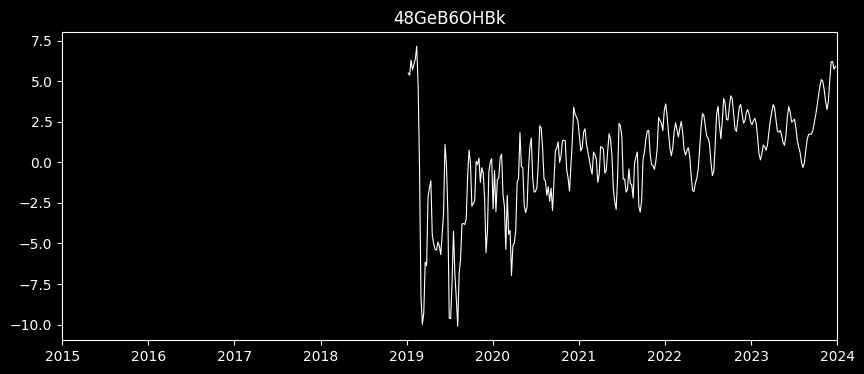

48GeB6OHBl


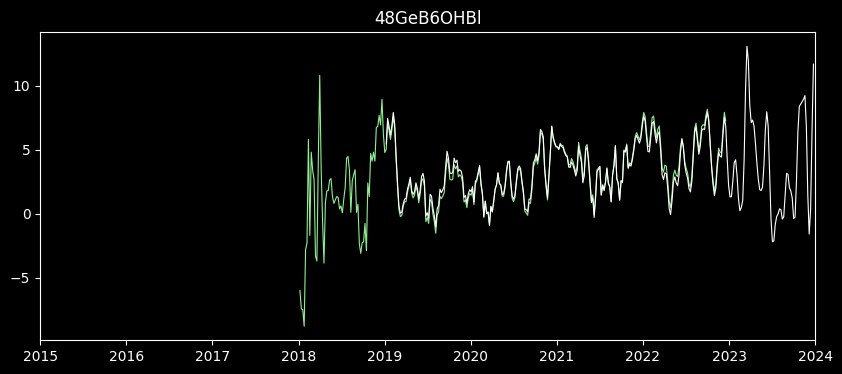

48GeB6OYEa


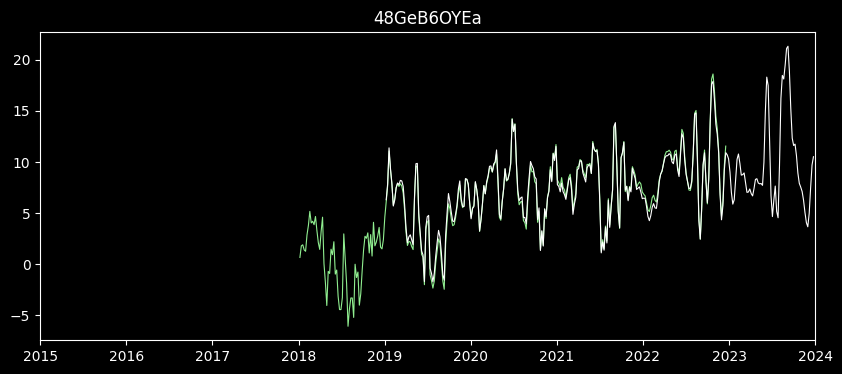

48GeB6OYEb


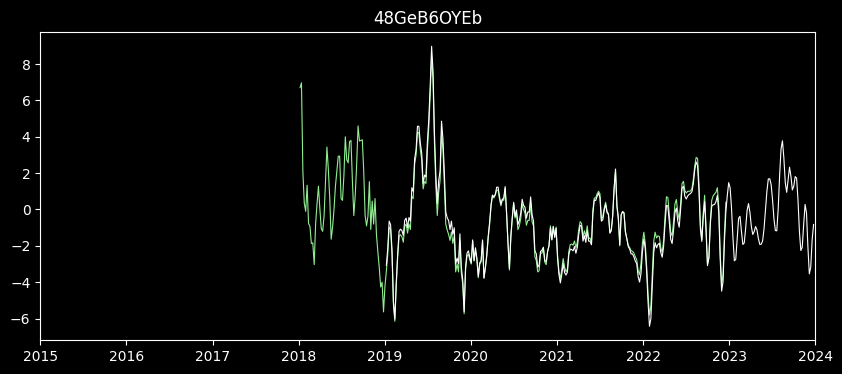

48GeB6OYEc


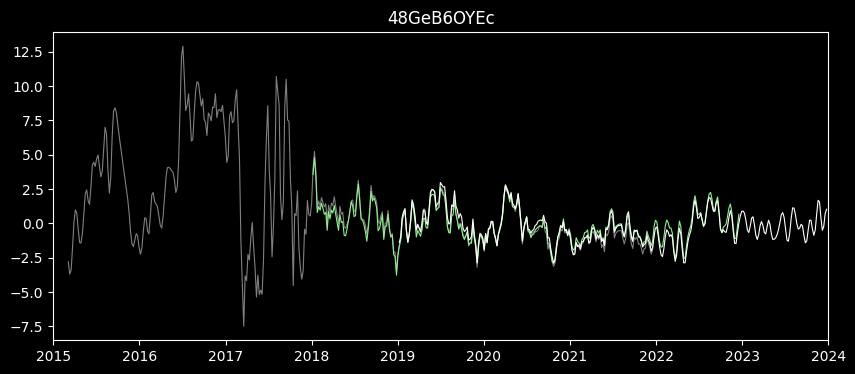

48GeB6OYEe


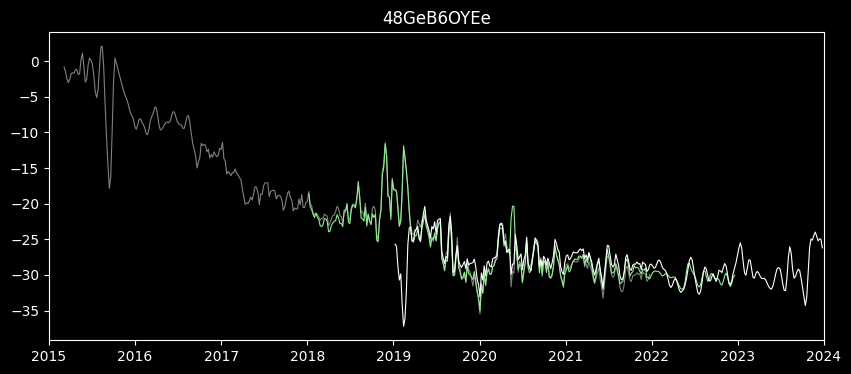

48GeB6OYEg


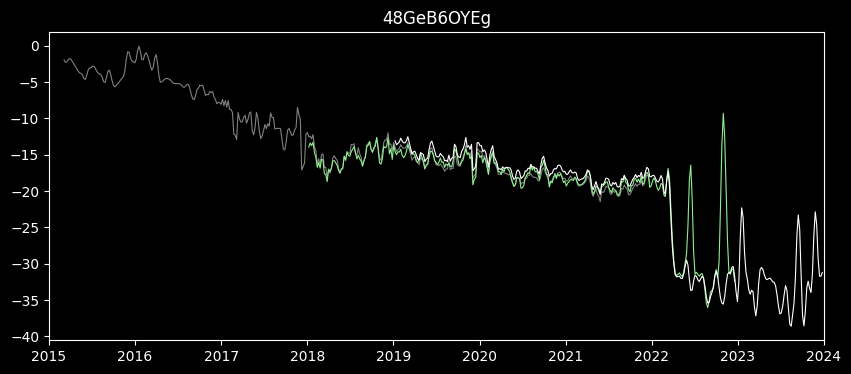

48GeB6OYEi


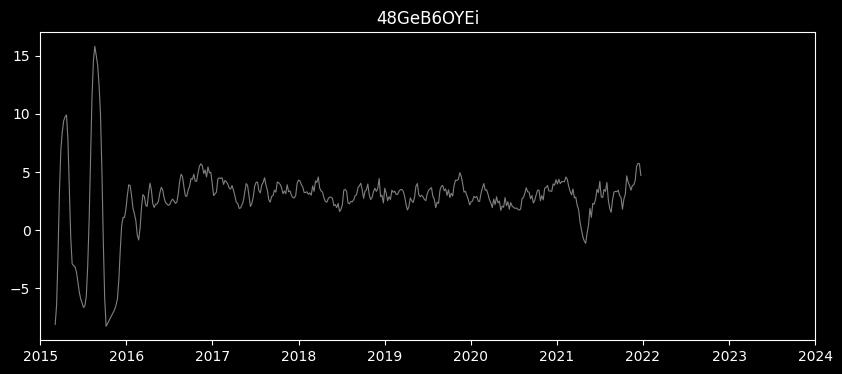

48GeB6OYEk


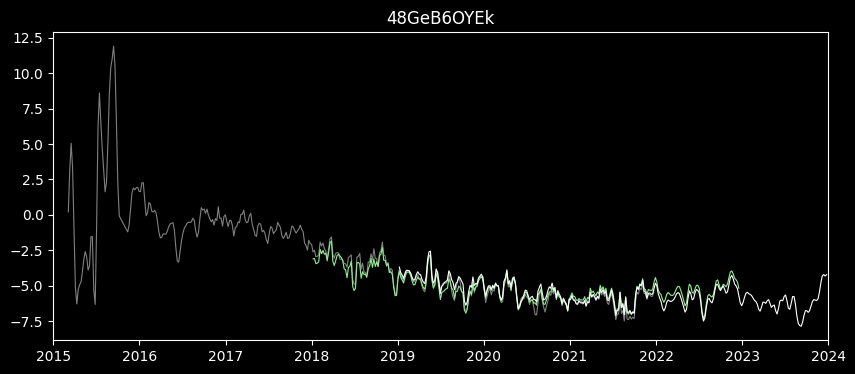

48GeB6OYEm


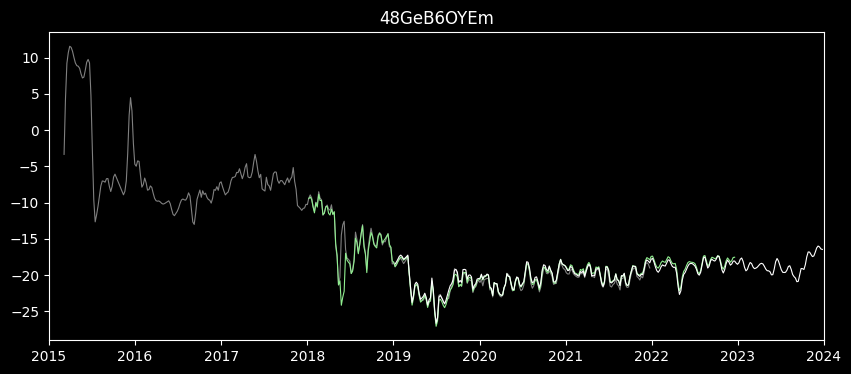

48GeB6OYEn


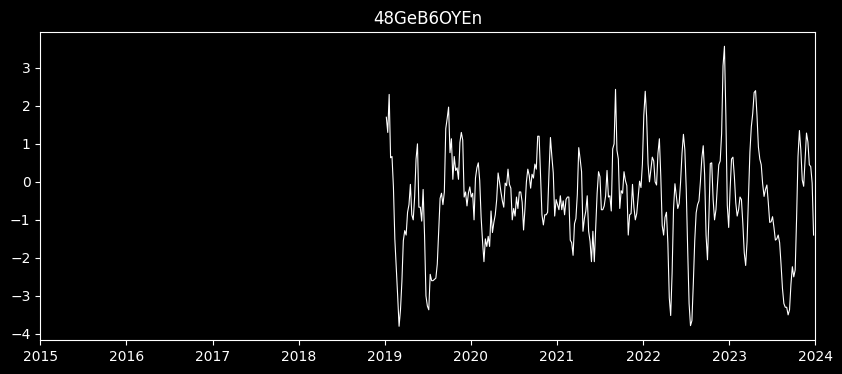

48GeB6OYEo


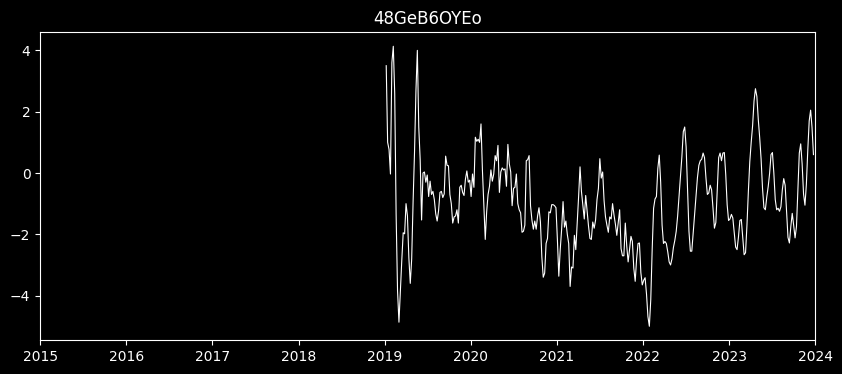

48GeB6OYEp


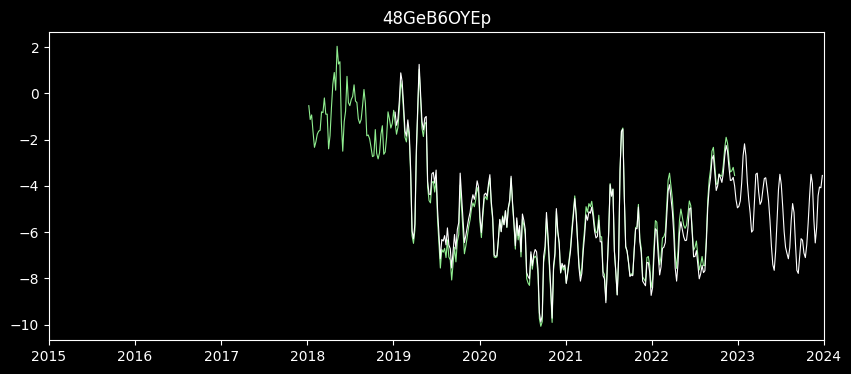

48GeB6OYEq


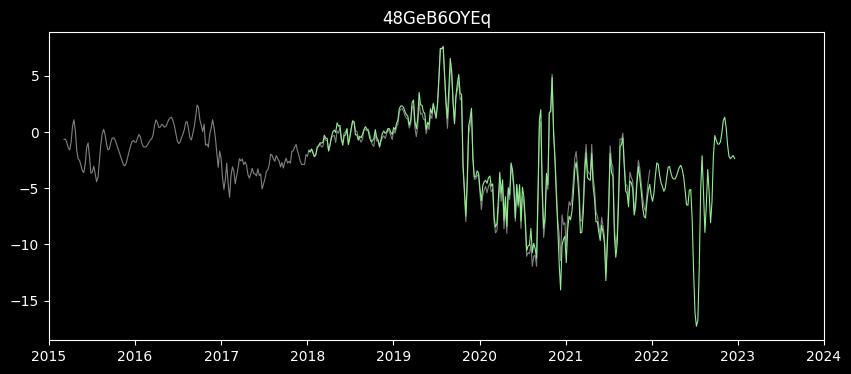

In [14]:
import matplotlib.pyplot as plt
colors = {'2015':'grey', '2018':'lightgreen', '2019':'white'}
for pid in df_aligned['pid'].unique():
    plt.figure(figsize=(10, 4))

    pid_df = df_aligned[df_aligned['pid'] == pid]
    print(pid)
    i=0
    for _, row in pid_df.iterrows():
        s = row[date_columns]
        s = s.rolling(3, center=True).mean()
        plt.plot(s, color=colors[row.start_year], linewidth=0.8)
        plt.xlim((pd.to_datetime('2015-01-01'), pd.to_datetime('2024-01-01')))
        plt.title(pid)
        i += 1
    plt.show()